In [250]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 
import matplotlib.dates as mdates

import warnings 
warnings.filterwarnings("ignore") 

In [19]:
#data = pd.read_csv('/Users/omarzakaria/Downloads/Final_Project/all_stocks_5yr.csv') 
data = pd.read_csv('/Users/omarzakaria/Downloads/newdata.csv') 
print(data.shape)
data.head(5) 

(217811, 27)


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,3M,Industrials,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,3M,Industrials,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,3M,Industrials,...,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,3M,Industrials,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,3M,Industrials,...,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0


In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217811 entries, 0 to 217810
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           217811 non-null  object 
 1   Open                           217811 non-null  float64
 2   High                           217811 non-null  float64
 3   Low                            217811 non-null  float64
 4   Close                          217811 non-null  float64
 5   Adj Close                      217811 non-null  float64
 6   Volume                         217811 non-null  float64
 7   Symbol                         217811 non-null  object 
 8   Security                       217811 non-null  object 
 9   GICS Sector                    217811 non-null  object 
 10  GICS Sub-Industry              217811 non-null  object 
 11  News - All News Volume         217318 non-null  float64
 12  News - Volume                 

In [21]:
# Changing date to pandas datatime type
data['Date'] = pd.to_datetime(data['Date']) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217811 entries, 0 to 217810
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           217811 non-null  datetime64[ns]
 1   Open                           217811 non-null  float64       
 2   High                           217811 non-null  float64       
 3   Low                            217811 non-null  float64       
 4   Close                          217811 non-null  float64       
 5   Adj Close                      217811 non-null  float64       
 6   Volume                         217811 non-null  float64       
 7   Symbol                         217811 non-null  object        
 8   Security                       217811 non-null  object        
 9   GICS Sector                    217811 non-null  object        
 10  GICS Sub-Industry              217811 non-null  object        
 11  

In [22]:
data['Percentage Change'] = ((data['Close'].shift(-7) - data['Open']) / data['Open']) * 100

# Insert 'Percentage Change' column after the 4th column
data.insert(4, 'Percentage_Change', data['Percentage Change'])

# Drop the original 'Percentage Change' column (which is now the last column)
data = data.drop(columns=['Percentage Change'])

# If you want to replace the 'Open' and 'Close' columns with the 'Percentage Change'
data = data.drop(columns=['Open', 'Close'])
data.head(5)

,Date,High,Low,Percentage_Change,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2020-09-30,163.100006,158.610001,5.201026,150.921692,3056900.0,MMM,3M,Industrials,Industrial Conglomerates,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,161.899994,157.720001,4.966699,149.612045,1989100.0,MMM,3M,Industrials,Industrial Conglomerates,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,161.940002,156.250000,6.493260,151.091309,1768600.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-10-05,163.500000,161.759995,3.790443,153.343170,1457000.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2020-10-06,165.699997,161.830002,3.450807,152.853195,2021900.0,MMM,3M,Industrials,Industrial Conglomerates,...,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0


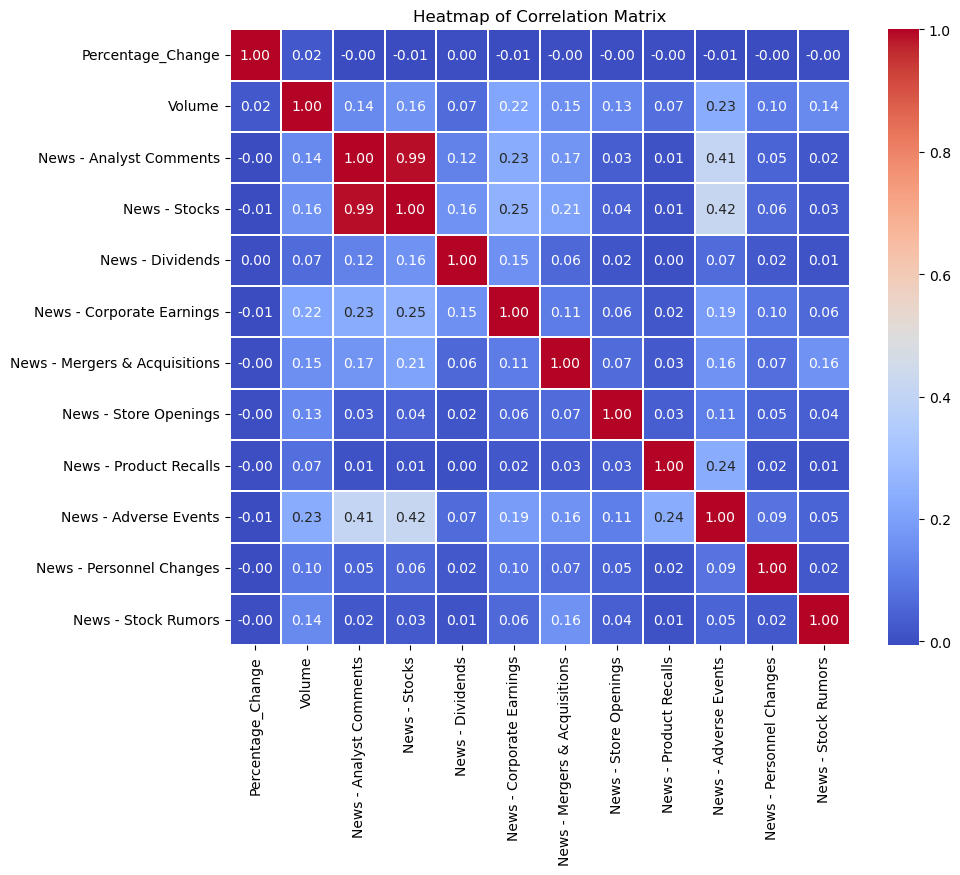

In [23]:
columns = ["Percentage_Change", "Volume", "News - Analyst Comments", "News - Stocks", "News - Dividends", 
           "News - Corporate Earnings", "News - Mergers & Acquisitions", "News - Store Openings", 
           "News - Product Recalls", "News - Adverse Events", "News - Personnel Changes", "News - Stock Rumors"]

# Compute correlation matrix
corr_matrix = data[columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)

# Show the plot
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [25]:
data = pd.read_csv('/Users/omarzakaria/Downloads/newdata.csv') 

In [26]:
# Create an empty list to store the names and dates of the stocks that possibly had a stock split
possible_stock_split = []

# Get the unique stock names
stocks = data['Symbol'].unique()

# Iterate over each stock
for stock in stocks:
    # Filter the dataframe for the current stock
    stock_data = data[data['Symbol'] == stock]
    
    # Sort the data by date
    stock_data = stock_data.sort_values(by='Date')
    
    # Calculate the ratio of the closing price of one day to the opening price of the next day
    ratios = stock_data['Close'].values[:-1] / stock_data['Open'].values[1:]
    
    # If the ratio is ever greater than two or less than 0.5, add the stock and the date to the list
    for i, ratio in enumerate(ratios):
        if ratio > 1.25 or ratio < 0.75:
            possible_stock_split.append((stock, stock_data['Date'].values[i+1]))

# Print the list of stocks and dates that possibly had a stock split
print("The stocks and dates that possibly had a stock split are:", possible_stock_split)

The stocks and dates that possibly had a stock split are: [('ALGN', '2022-04-28'), ('BIIB', '2020-11-09'), ('CCL', '2020-11-09'), ('META', '2022-02-03'), ('NFLX', '2022-01-21'), ('NFLX', '2022-04-20'), ('PYPL', '2022-02-02'), ('ROST', '2022-05-20'), ('SEDG', '2020-11-03'), ('TGT', '2022-05-18'), ('TER', '2022-01-27')]


Our algorithm detected stock splits for all of the above. After double checking online, it appears that none of these are stock splits and that all behavior is natural.

In [27]:
companies = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL', 'META']

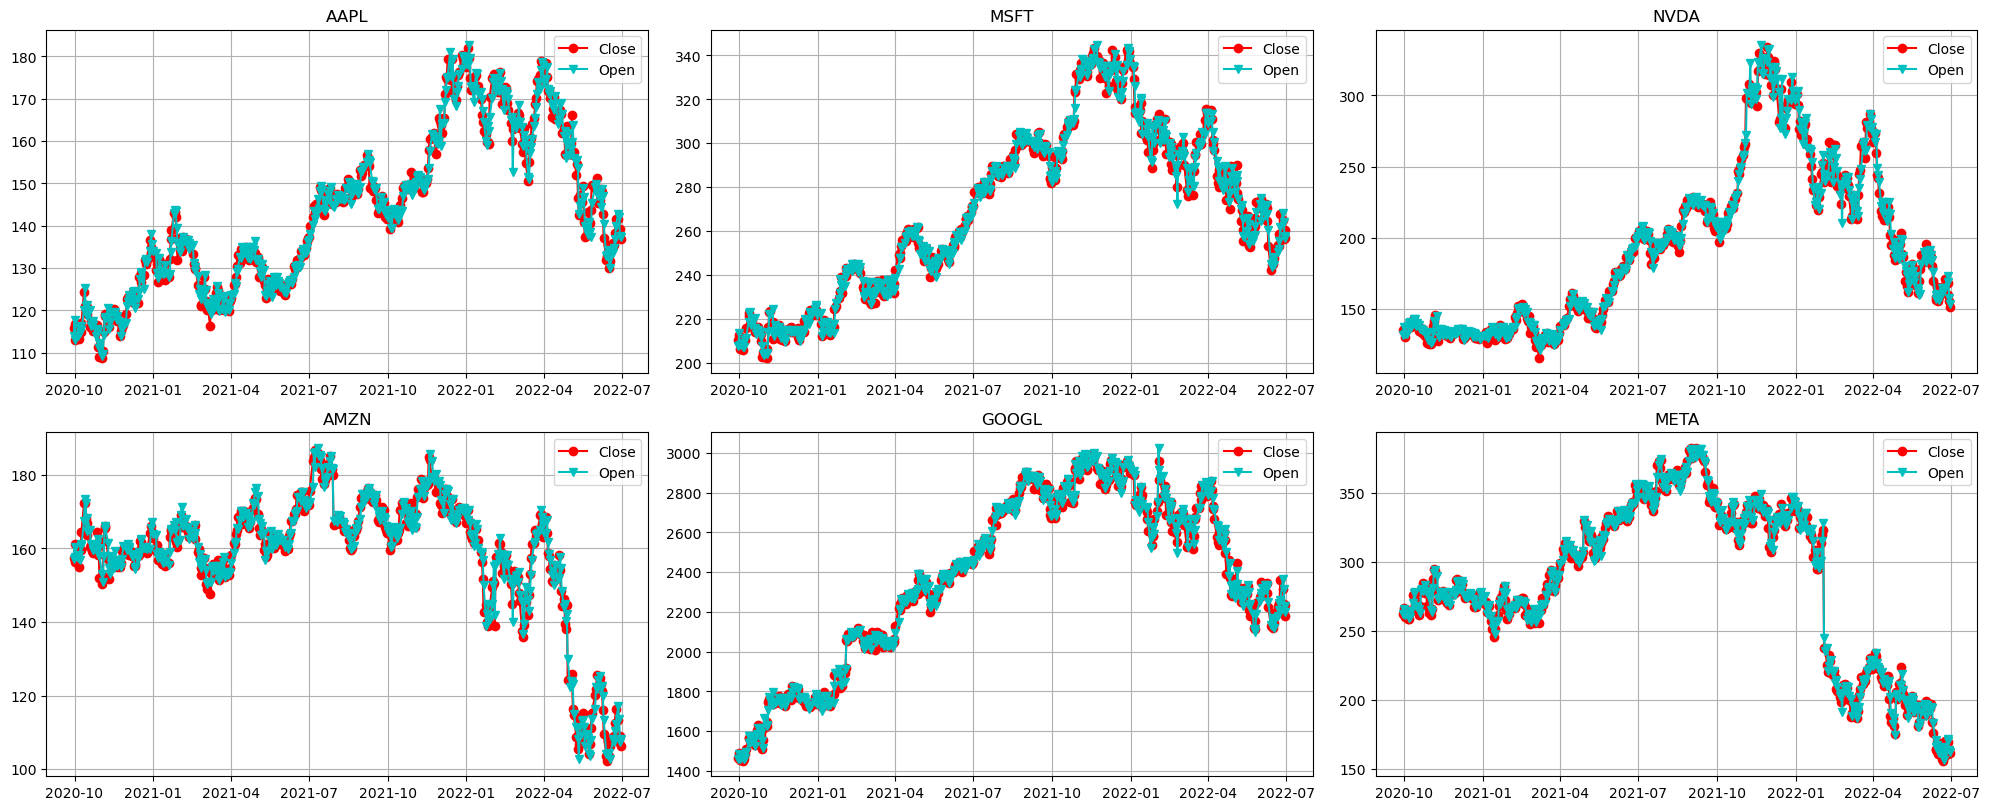

In [28]:
data['Date'] = pd.to_datetime(data['Date']) 

# Plotting stocks with suspected stock split
plt.figure(figsize=(20, 12))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Symbol'] == company]
    plt.plot(c['Date'], c['Close'], c="r", label="Close", marker="o")
    plt.plot(c['Date'], c['Open'], c="c", label="Open", marker="v")
    plt.title(company)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

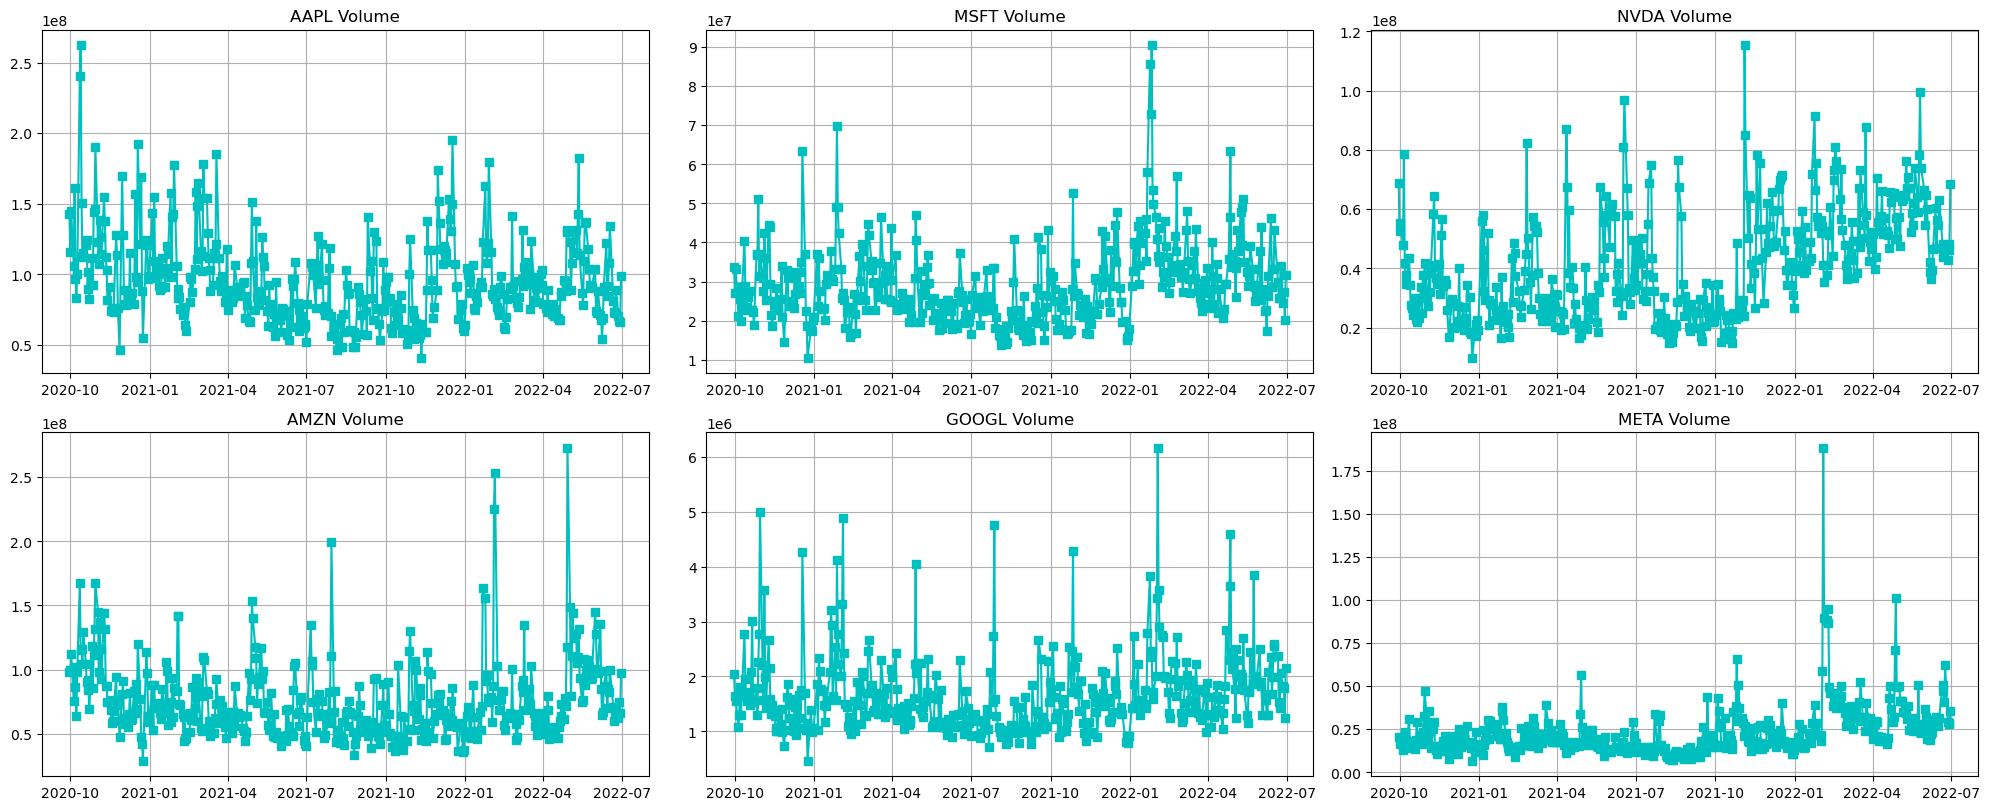

In [29]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Symbol'] == company]
    plt.plot(c['Date'], c['Volume'], c='c', marker='s')
    plt.title(f"{company} Volume")
    plt.grid(True)
    plt.tight_layout()

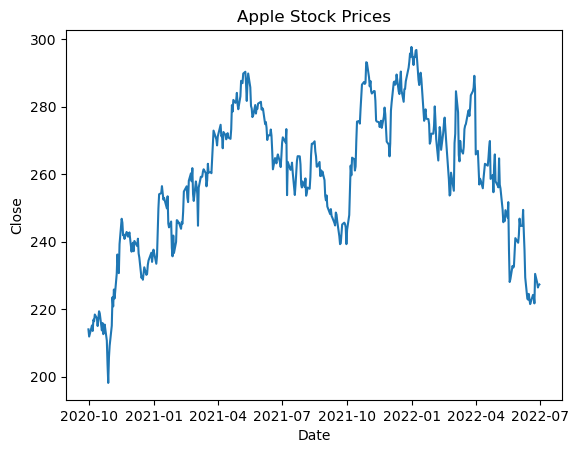

61


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1324
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0708
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0400
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0171
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0369
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0178
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0205
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0122
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0071
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0114
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0139
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0147
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0233
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

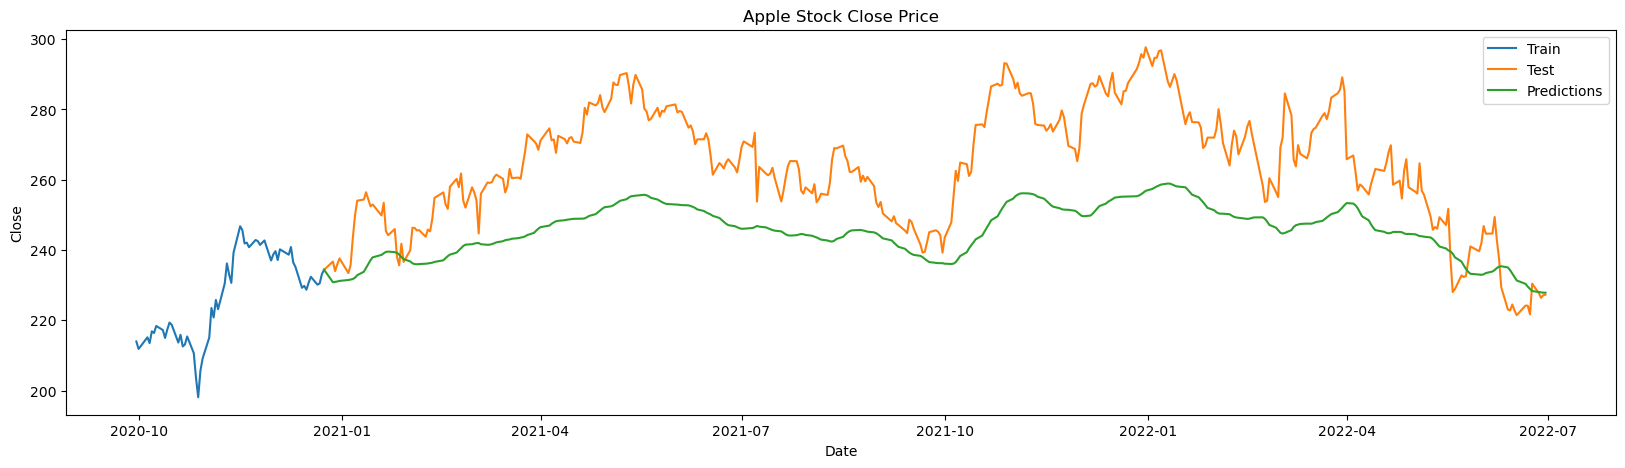

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted percentage change:  [[0.05020065]
 [0.04769113]
 [0.07284983]
 [0.10579986]
 [0.05918584]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


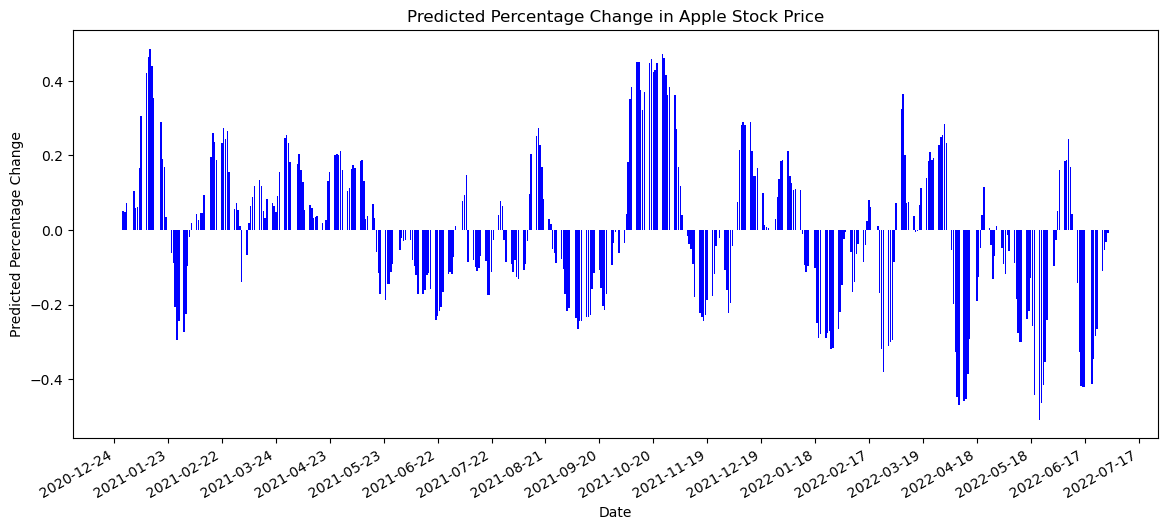

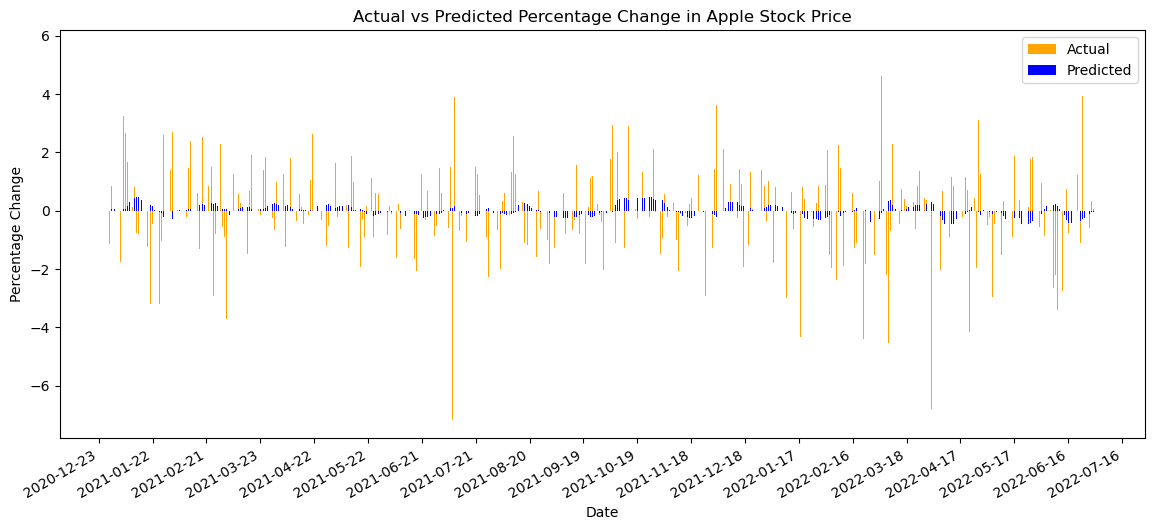

Number of correct predictions:  195
Number of incorrect predictions:  184
Average error:  0.5092199813145148 %
Initial balance: $100
Final balance: $ 97.09
Percent change from initial to final balance:  -2.91 %
Annualized percent change:  -2.81 %


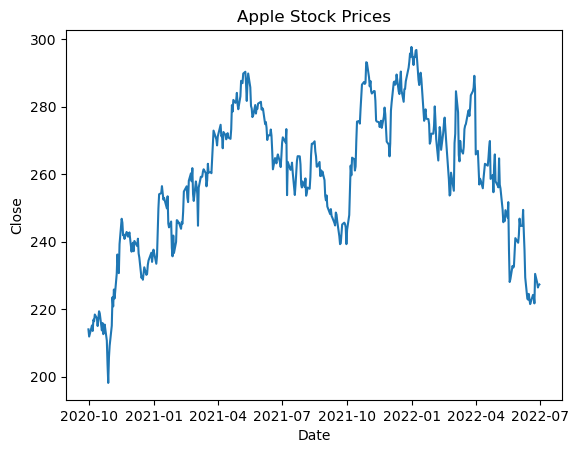

61


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1366
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0889
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0534
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0318
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0092
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0276
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0370
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0320
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0173
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0105
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0082
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0122
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0137
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0132
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0143
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

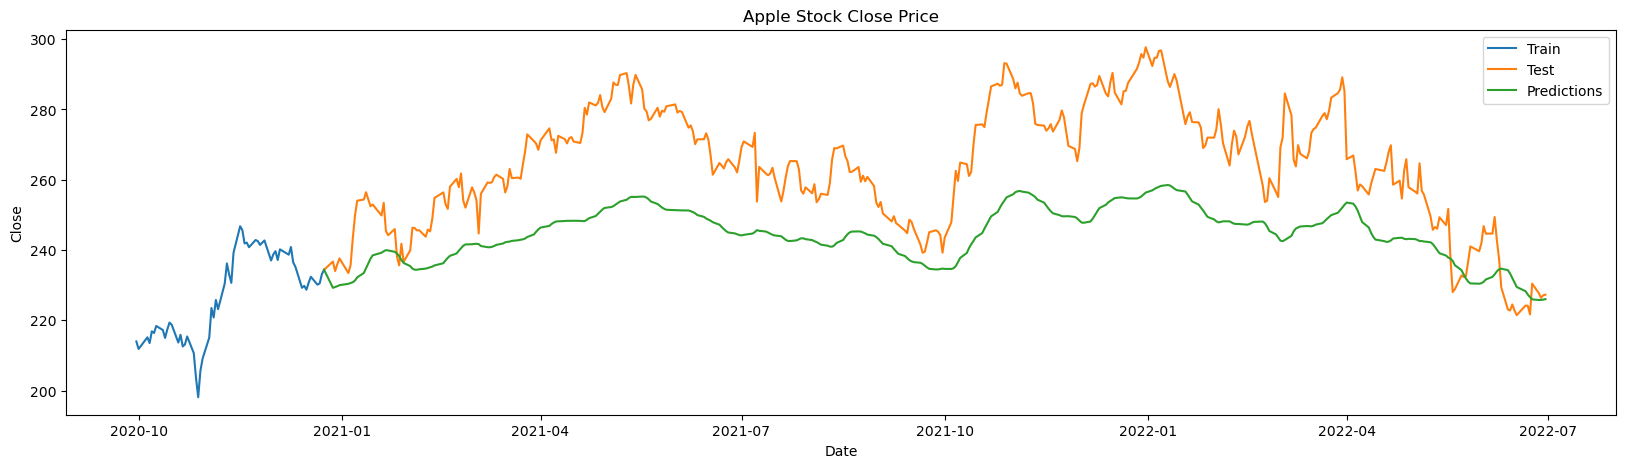

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted percentage change:  [[0.10371882]
 [0.10097153]
 [0.12856983]
 [0.16433552]
 [0.09989269]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


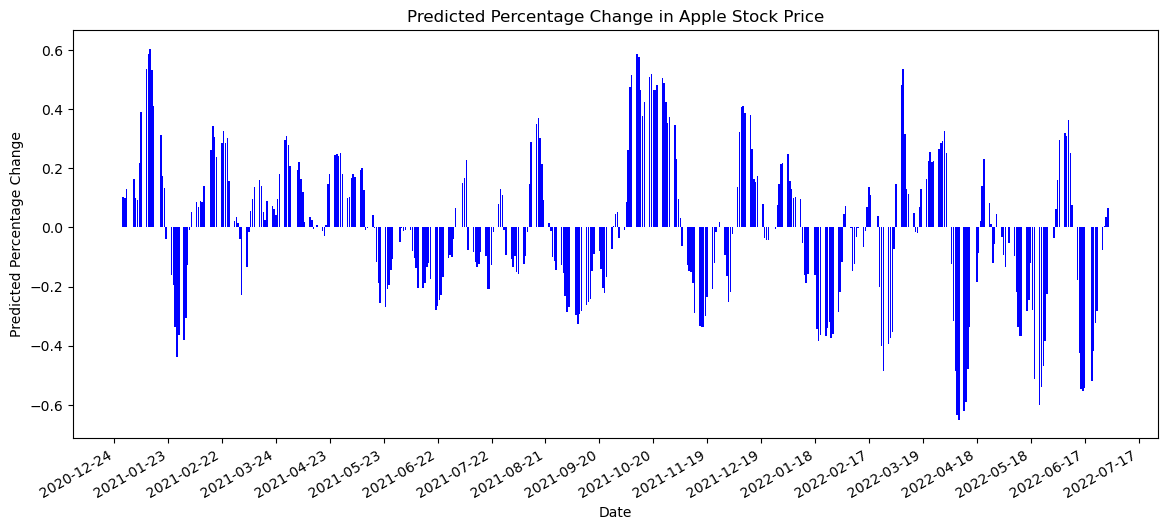

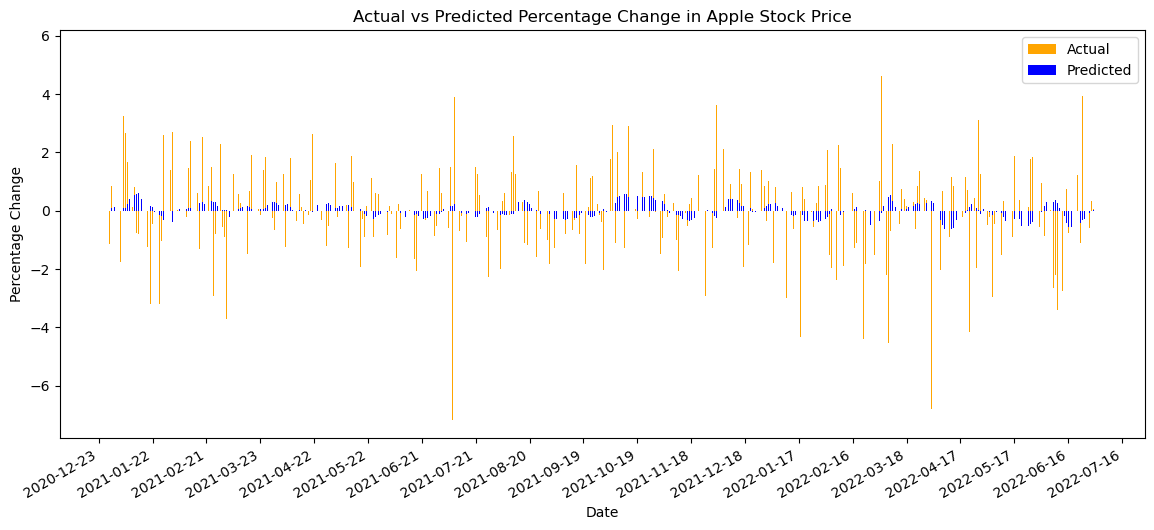

Number of correct predictions:  190
Number of incorrect predictions:  189
Average error:  0.5294011837572464 %
Initial balance: $100
Final balance: $ 96.88
Percent change from initial to final balance:  -3.12 %
Annualized percent change:  -3.01 %


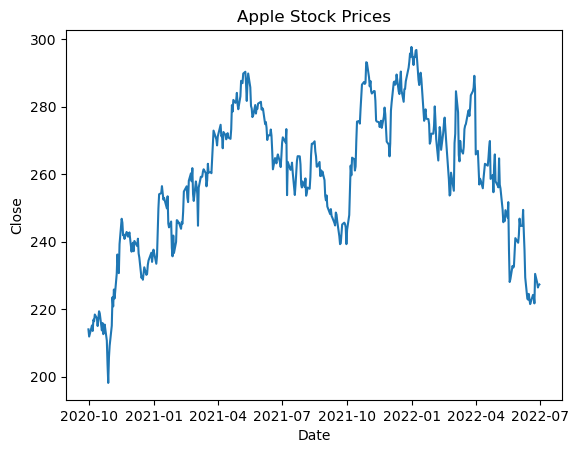

61


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1392
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0895
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0484
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0216
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0165
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0268
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0347
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0298
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0180
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0112
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0115
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0187
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0121
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0185
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0207
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

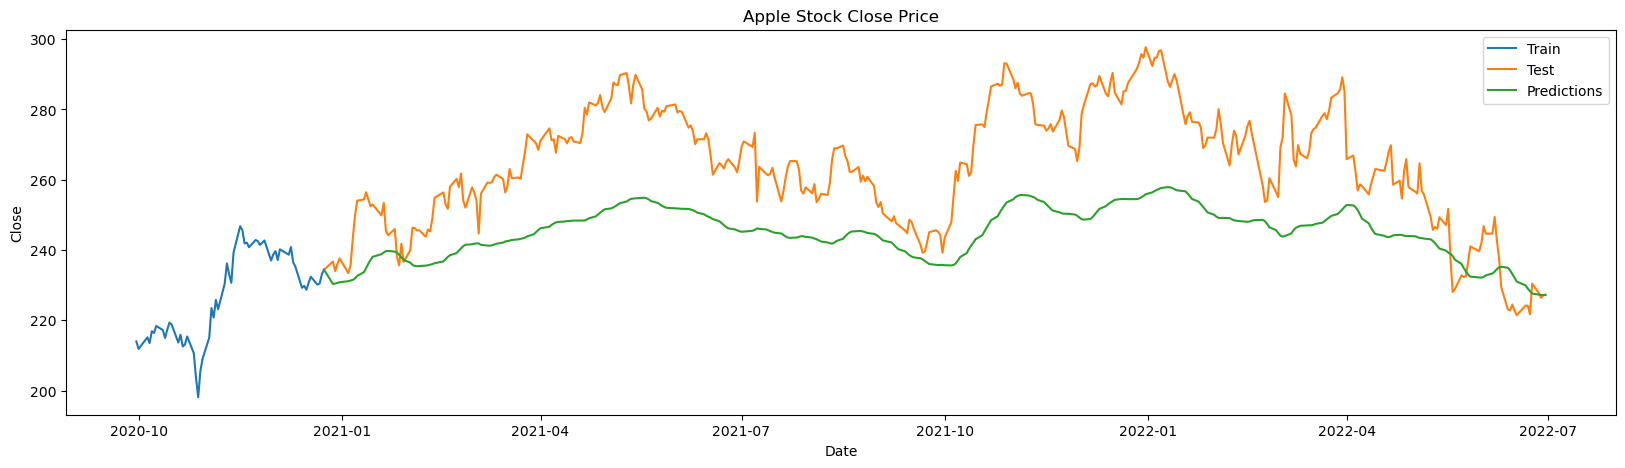

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted percentage change:  [[0.06014732]
 [0.06646723]
 [0.09388156]
 [0.12732093]
 [0.0834083 ]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


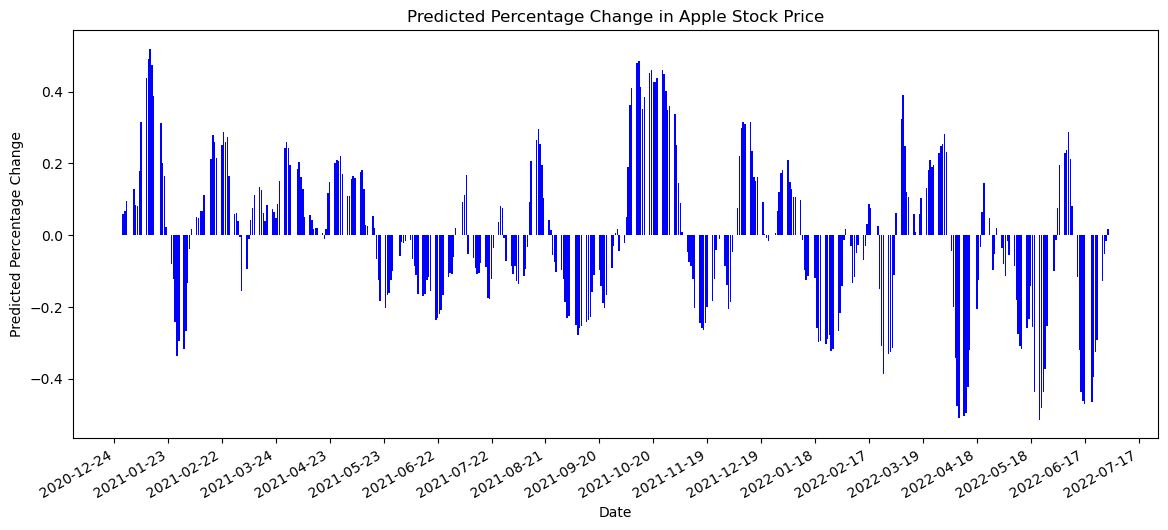

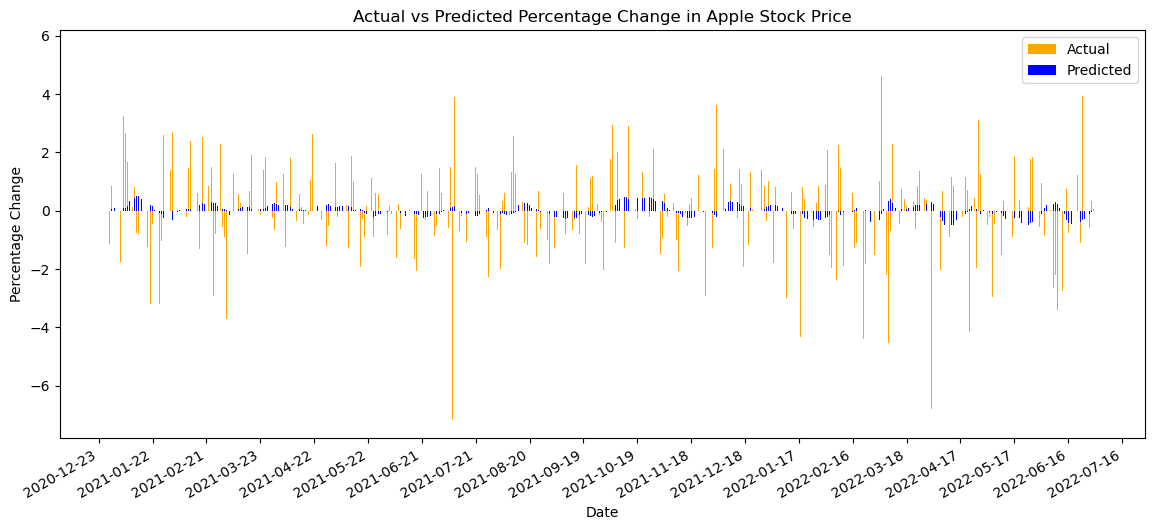

Number of correct predictions:  194
Number of incorrect predictions:  185
Average error:  0.5249061669002477 %
Initial balance: $100
Final balance: $ 96.88
Percent change from initial to final balance:  -3.12 %
Annualized percent change:  -3.01 %


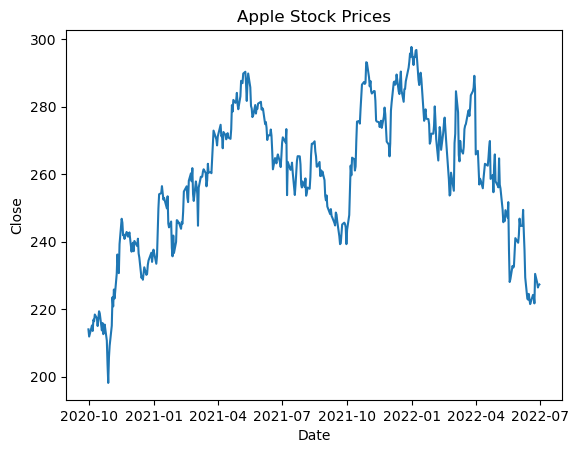

61


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1661
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0976
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0687
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0306
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0239
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0193
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0401
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0243
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0225
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0186
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0088
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0105
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0153
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

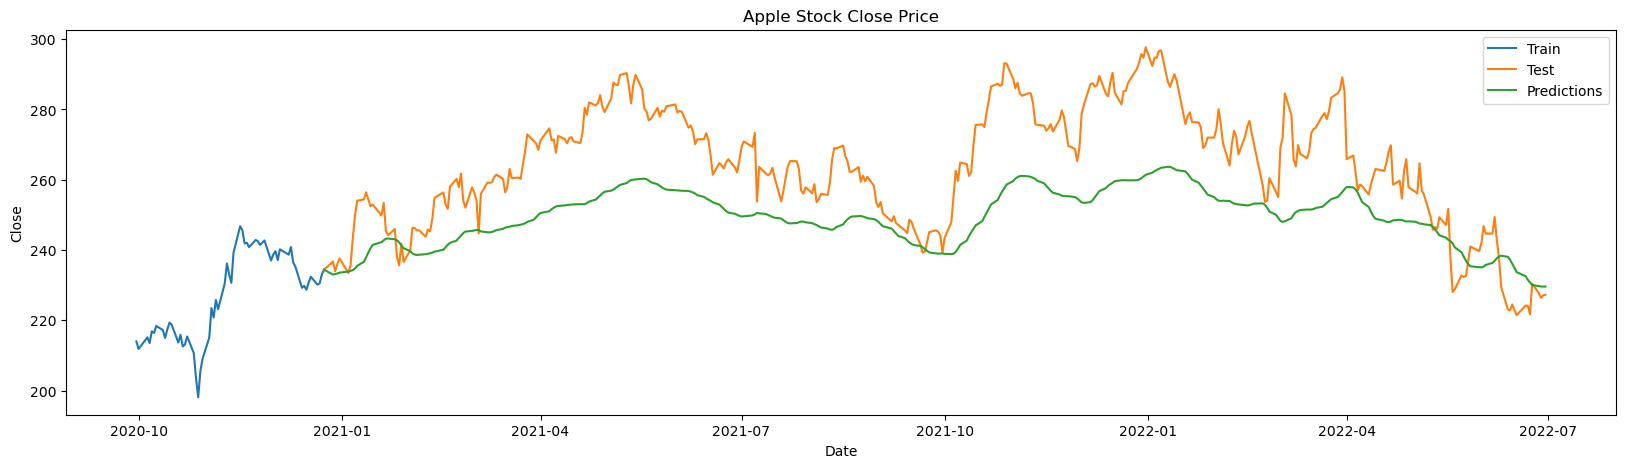

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted percentage change:  [[0.06517141]
 [0.07102539]
 [0.09921978]
 [0.1347926 ]
 [0.08676782]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


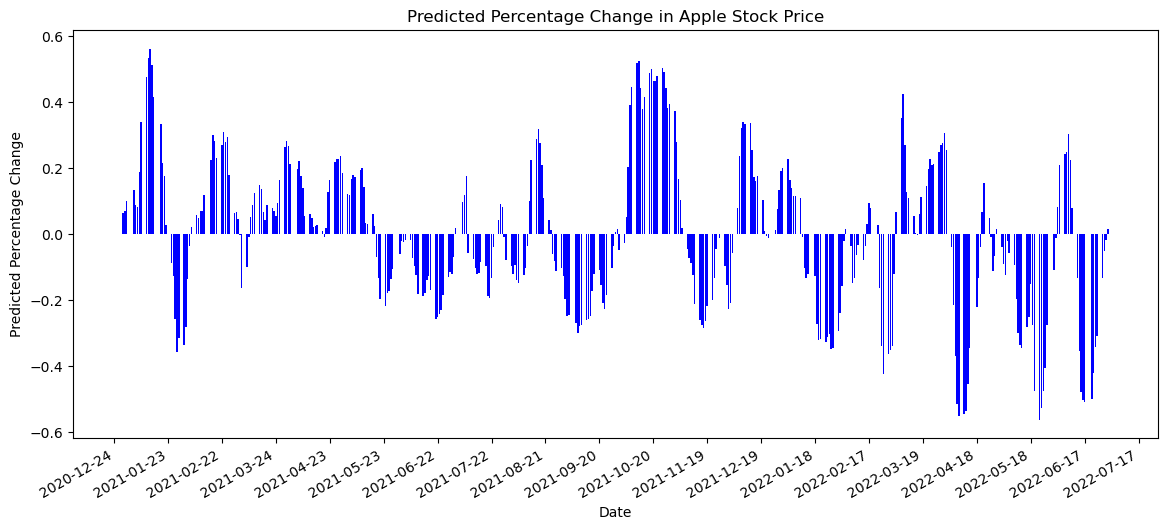

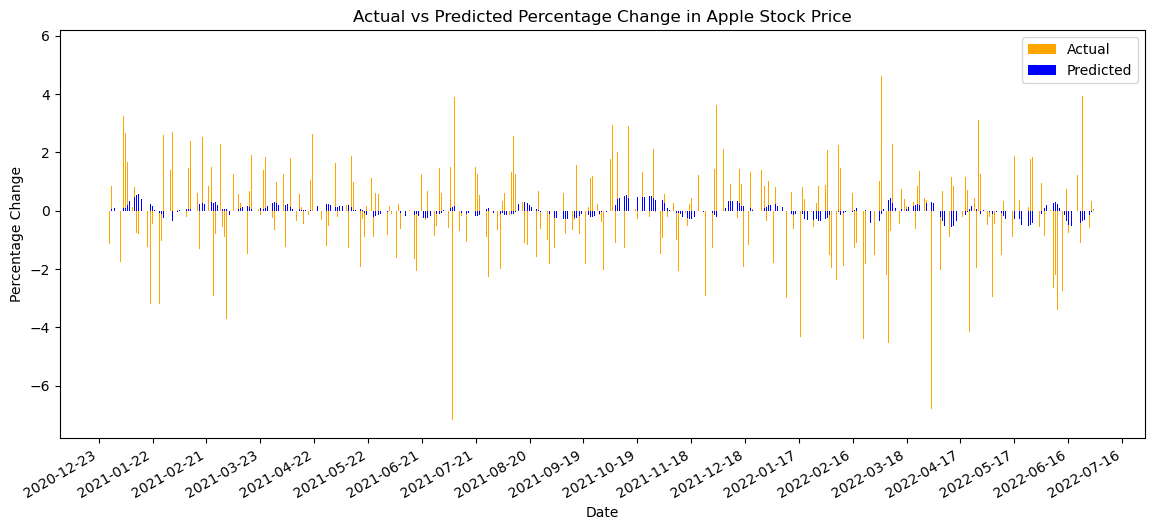

Number of correct predictions:  194
Number of incorrect predictions:  185
Average error:  0.5474950754828883 %
Initial balance: $100
Final balance: $ 96.88
Percent change from initial to final balance:  -3.12 %
Annualized percent change:  -3.01 %


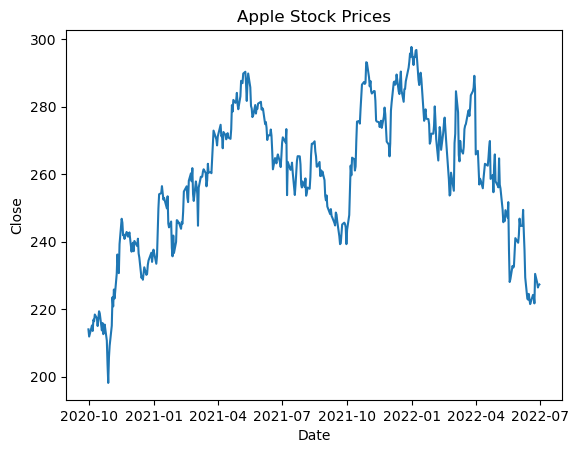

61


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1645
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1117
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0741
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0406
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0196
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0161
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0205
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0294
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0314
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0350
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0136
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0097
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0100
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0204
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

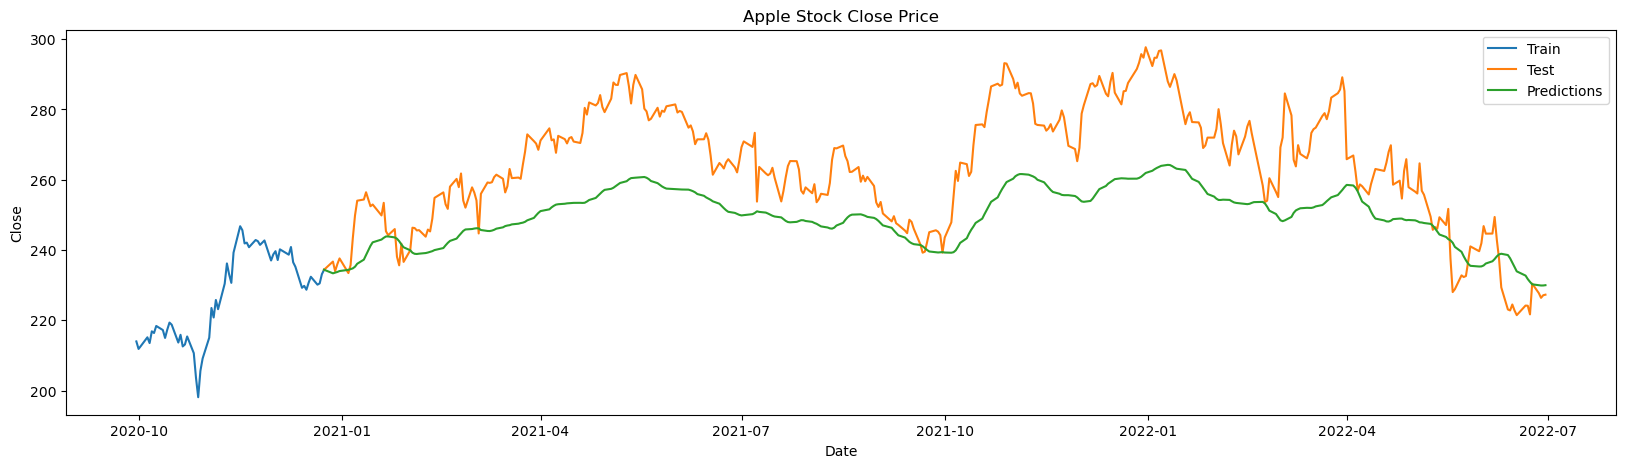

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted percentage change:  [[0.0811618 ]
 [0.08367658]
 [0.11147331]
 [0.14678115]
 [0.09205057]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


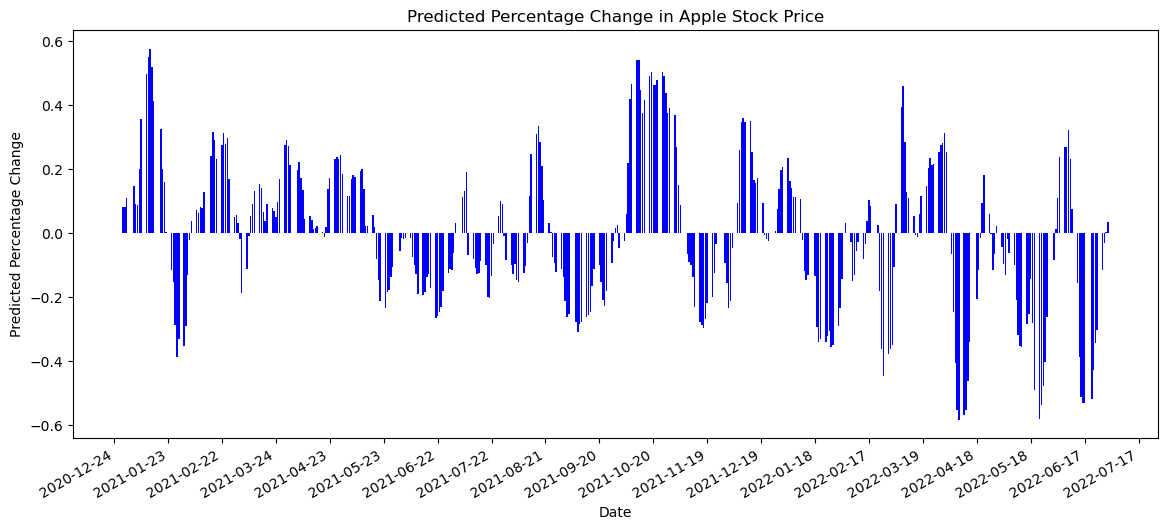

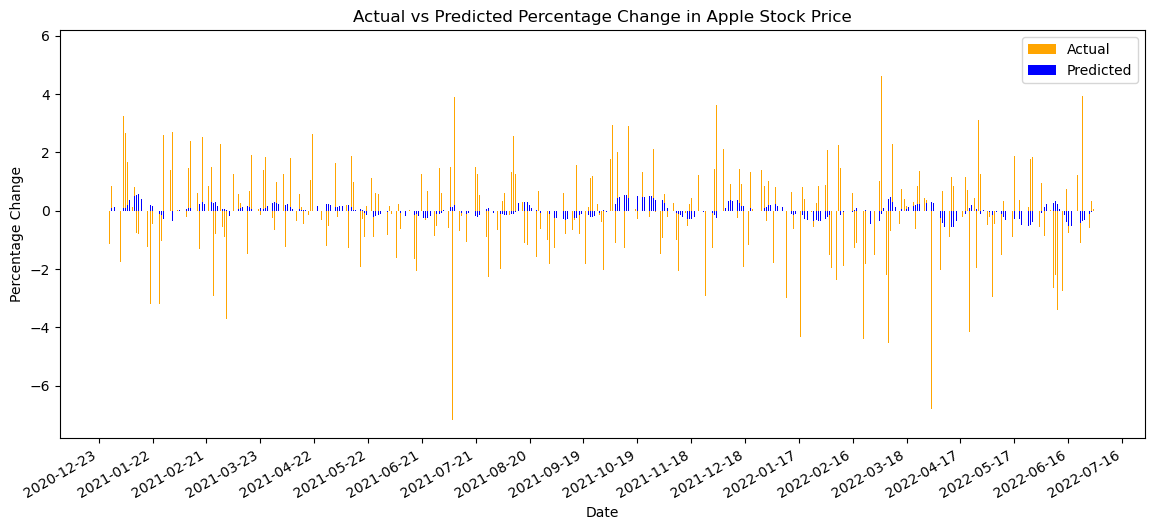

Number of correct predictions:  194
Number of incorrect predictions:  185
Average error:  0.5441765188480956 %
Initial balance: $100
Final balance: $ 97.49
Percent change from initial to final balance:  -2.51 %
Annualized percent change:  -2.42 %


In [251]:
import random

all_symbols = data['Symbol'].unique()
symbols = random.sample(list(all_symbols), 5)
all_predictions = []
all_y_test = []

for symbol in symbols:
    # Filter data for the current symbol
    stock_data = data[data['Symbol'] == symbol]
    prediction_range = apple.loc[(apple['Date'] > datetime(2013,1,1)) 
    & (apple['Date']<datetime(2018,1,1))] 
    plt.plot(apple['Date'],apple['Close']) 
    plt.xlabel("Date") 
    plt.ylabel("Close") 
    plt.title("Apple Stock Prices") 
    plt.show()
    close_data = apple.filter(['Close']) 
    dataset = close_data.values 
    training = int(np.ceil(len(dataset) * .138)) 
    print(training) 
    

    scaler = MinMaxScaler(feature_range=(0, 1)) 
    scaled_data = scaler.fit_transform(dataset) 

    train_data = scaled_data[0:int(training), :] 

    # prepare feature and labels 
    x_train = [] 
    y_train = [] 

    for i in range(35, len(train_data)): 
        x_train.append(train_data[i-35:i, 0]) 
        y_train.append(train_data[i, 0]) 

    x_train, y_train = np.array(x_train), np.array(y_train) 
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
    model = keras.models.Sequential() 
    model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
    model.add(keras.layers.LSTM(units=64)) 
    model.add(keras.layers.Dense(32)) 
    model.add(keras.layers.Dropout(0.5)) 
    model.add(keras.layers.Dense(1)) 
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error') 
    history = model.fit(x_train, y_train, epochs=50) 
    test_data = scaled_data[training - 35:, :] 
    x_test = [] 
    y_test = dataset[training:, :] 
    for i in range(35, len(test_data)): 
        x_test.append(test_data[i-35:i, 0]) 

    x_test = np.array(x_test) 
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# predict the testing data 
    predictions = model.predict(x_test) 
    predictions = scaler.inverse_transform(predictions) 

# evaluation metrics 
    mse = np.mean(((predictions - y_test) ** 2)) 
    print("MSE", mse) 
    print("RMSE", np.sqrt(mse)) 
    train = apple[0:training] 
    test = apple[training:] 
    test['Predictions'] = predictions 

    print(test['Predictions'])
# Append the last day of train to the first day of test to remove discontinuity in graph below
    test = pd.concat([train.iloc[-1:], test])
# Convert predictions to a pandas Series
    predictions_series = pd.Series(predictions.flatten(), name='Predictions')

# Append the last day of train to the first day of predictions
    predictions_df = pd.concat([train['Close'].iloc[-1:].reset_index(drop=True), predictions_series], ignore_index=True)
    print(train['Close'])
    print(predictions_df)
    plt.figure(figsize=(20, 5)) 
    plt.plot(train['Date'], train['Close'], label='Train') 
    plt.plot(test['Date'], test['Close'], label='Test') 
    plt.plot(test['Date'], predictions_df, label='Predictions') 
    plt.title('Apple Stock Close Price') 
    plt.xlabel('Date') 
    plt.ylabel("Close") 
    plt.legend()
    plt.show()
    # predict the testing data 
    predictions = model.predict(x_test) 
    predictions = scaler.inverse_transform(predictions) 

    # Calculate the percentage change for predictions
    predictions_percentage_change = (predictions[1:] - predictions[:-1]) / predictions[:-1] * 100
    
    # Calculate the percentage change for real values
    real_values_percentage_change = (y_test[1:] - y_test[:-1]) / y_test[:-1] * 100

    # Print the first 5 values as a check
    print("Predicted percentage change: ", predictions_percentage_change[:5])
    print("Real percentage change: ", real_values_percentage_change[:5])
    

    # Assuming 'dates' is a list of dates corresponding to your predictions
    dates = apple['Date'][training+1:]  # Adjust as necessary

    plt.figure(figsize=(14, 6))
    plt.bar(dates, predictions_percentage_change.flatten(), color='blue')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust interval for date ticks
    plt.gcf().autofmt_xdate()  # Rotation of date labels
    plt.title('Predicted Percentage Change in Apple Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Predicted Percentage Change')
    plt.show()


    # Assuming 'dates' is a list of dates corresponding to your predictions
    dates = apple['Date'][training+1:]  # Adjust as necessary

    # Convert dates to numpy array for calculations
    dates_np = np.array(dates)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(14, 6))

    # Width of a bar 
    width = 0.4

    # Creating actual bars
    ax.bar(dates_np, real_values_percentage_change.flatten(), width, color='orange', label='Actual')

    # Creating predicted bars
    # Add one day (in numpy datetime64 format) for the predicted bars
    ax.bar(dates_np + np.timedelta64(1, 'D'), predictions_percentage_change.flatten(), width, color='blue', label='Predicted')

    # Formatting the dates on the x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust interval for date ticks
    fig.autofmt_xdate()  # Rotation of date labels

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title('Actual vs Predicted Percentage Change in Apple Stock Price')
    plt.legend()

    # Displaying the plot
    plt.show()
    # Calculate the sign of the actual and predicted percentage changes
    actual_sign = np.sign(real_values_percentage_change)
    predicted_sign = np.sign(predictions_percentage_change)

    # Calculate the number of correct and incorrect predictions
    correct_predictions = np.sum(actual_sign == predicted_sign)
    incorrect_predictions = np.sum(actual_sign != predicted_sign)

    print("Number of correct predictions: ", correct_predictions)
    print("Number of incorrect predictions: ", incorrect_predictions)

    # Calculate the average error (not absolute value)
    average_error = np.mean(real_values_percentage_change - predictions_percentage_change)

    print("Average error: ", average_error*100, "%")
    # Initialize cash and stock variables
    cash = 50.0
    stock = 50.0

    # Iterate through each day
    for i in range(len(predictions_percentage_change)):
        # If the model predicts a positive % increase for the next day, buy $1 of stock
        if predictions_percentage_change[i] > 0 and cash >= 1:
            cash -= 1
            stock += 1 / (1 + real_values_percentage_change[i] / 100)
        # If the model predicts a negative % increase for the next day, sell $1 of stock
        elif predictions_percentage_change[i] < 0 and stock >= 1:
            cash += 1
            stock -= 1 / (1 - real_values_percentage_change[i] / 100)

        # Update the value of the stock based on the actual % change
        stock *= (1 + real_values_percentage_change[i] / 100)

    # Calculate the final balance of cash + stock
    final_balance = cash + stock

    if isinstance(final_balance, np.ndarray) and final_balance.size == 1:
        final_balance = final_balance.item()

    print("Initial balance: $100")
    print("Final balance: $", round(final_balance, 2))
    # Calculate the percent change from initial to final balance
    percent_change = (final_balance - 100) / 100 * 100

    # Calculate the number of days
    num_days = len(predictions_percentage_change)

    # Calculate the annualized percent change
    annualized_percent_change = ((final_balance / 100) ** (365 / num_days) - 1) * 100

    print("Percent change from initial to final balance: ", round(percent_change, 2), "%")
    print("Annualized percent change: ", round(annualized_percent_change, 2), "%")

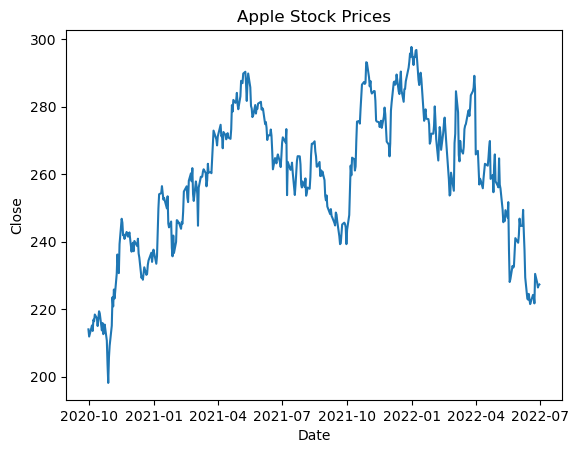

In [248]:
apple = data[data['Symbol'] == 'NSC'] 
prediction_range = apple.loc[(apple['Date'] > datetime(2013,1,1)) 
& (apple['Date']<datetime(2018,1,1))] 
plt.plot(apple['Date'],apple['Close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Apple Stock Prices") 
plt.show()

In [227]:
close_data = apple.filter(['Close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .138)) 
print(training) 

61


In [228]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

train_data = scaled_data[0:int(training), :] 

# prepare feature and labels 
x_train = [] 
y_train = [] 

for i in range(35, len(train_data)): 
    x_train.append(train_data[i-35:i, 0]) 
    y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [229]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
model.compile(optimizer='adam', loss='mean_squared_error') 
history = model.fit(x_train, y_train, epochs=50) 

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1547
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1072
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0573
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0258
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0194
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0384
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0284
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0395
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0155
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0140
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0177
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0113
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0155
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0151
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0225
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [231]:
test_data = scaled_data[training - 35:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(35, len(test_data)): 
    x_test.append(test_data[i-35:i, 0]) 

x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
MSE 389.3500820392435
RMSE 19.731955859448995


In [232]:
train = apple[0:training] 
test = apple[training:] 
test['Predictions'] = predictions 

print(test['Predictions'])

147027    232.849731
147028    232.941254
147029    233.055206
147030    233.232574
147031    233.485870
             ...    
147402    230.370636
147403    230.046738
147404    229.884430
147405    229.801147
147406    229.791138
Name: Predictions, Length: 380, dtype: float32


In [233]:
# Append the last day of train to the first day of test to remove discontinuity in graph below
test = pd.concat([train.iloc[-1:], test])

In [234]:
#print(predictions)

In [235]:
# Convert predictions to a pandas Series
predictions_series = pd.Series(predictions.flatten(), name='Predictions')

# Append the last day of train to the first day of predictions
predictions_df = pd.concat([train['Close'].iloc[-1:].reset_index(drop=True), predictions_series], ignore_index=True)

In [236]:
print(train['Close'])

146966    213.990005
146967    211.850006
146968    212.660004
146969    215.160004
146970    213.520004
             ...    
147022    232.389999
147023    230.139999
147024    230.500000
147025    233.119995
147026    234.389999
Name: Close, Length: 61, dtype: float64


In [237]:
print(predictions_df)

0      234.389999
1      232.849731
2      232.941254
3      233.055206
4      233.232574
          ...    
376    230.370636
377    230.046738
378    229.884430
379    229.801147
380    229.791138
Length: 381, dtype: float64


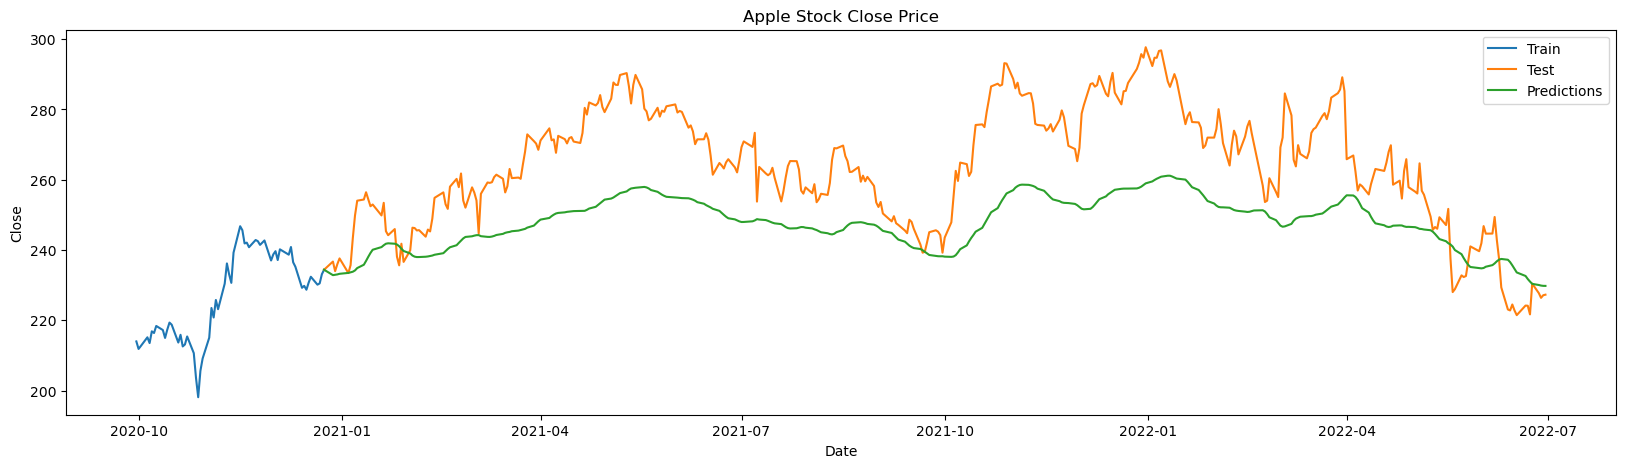

In [238]:
plt.figure(figsize=(20, 5)) 
plt.plot(train['Date'], train['Close'], label='Train') 
plt.plot(test['Date'], test['Close'], label='Test') 
plt.plot(test['Date'], predictions_df, label='Predictions') 
plt.title('Apple Stock Close Price') 
plt.xlabel('Date') 
plt.ylabel("Close") 
plt.legend()
plt.show()

In [239]:
# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# Calculate the percentage change for predictions
predictions_percentage_change = (predictions[1:] - predictions[:-1]) / predictions[:-1] * 100

# Calculate the percentage change for real values
real_values_percentage_change = (y_test[1:] - y_test[:-1]) / y_test[:-1] * 100

# Print the first 5 values as a check
print("Predicted percentage change: ", predictions_percentage_change[:5])
print("Real percentage change: ", real_values_percentage_change[:5])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted percentage change:  [[0.03930527]
 [0.04891904]
 [0.07610565]
 [0.10860229]
 [0.07310938]]
Real percentage change:  [[-1.14908586]
 [ 0.8504595 ]
 [ 0.69073858]
 [-1.75497587]
 [ 0.97241443]]


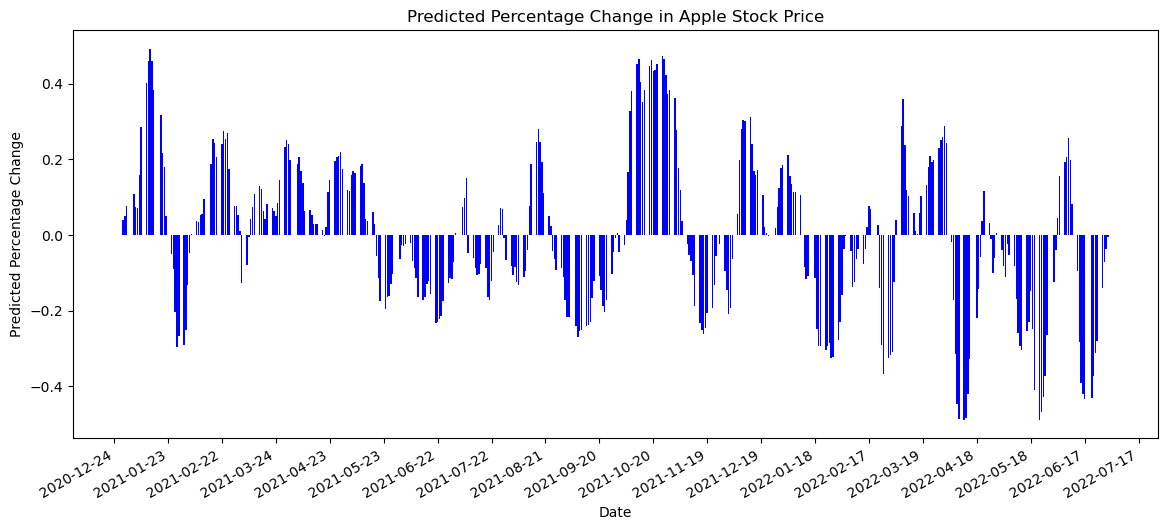

In [240]:
import matplotlib.dates as mdates

# Assuming 'dates' is a list of dates corresponding to your predictions
dates = apple['Date'][training+1:]  # Adjust as necessary

plt.figure(figsize=(14, 6))
plt.bar(dates, predictions_percentage_change.flatten(), color='blue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust interval for date ticks
plt.gcf().autofmt_xdate()  # Rotation of date labels
plt.title('Predicted Percentage Change in Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Predicted Percentage Change')
plt.show()

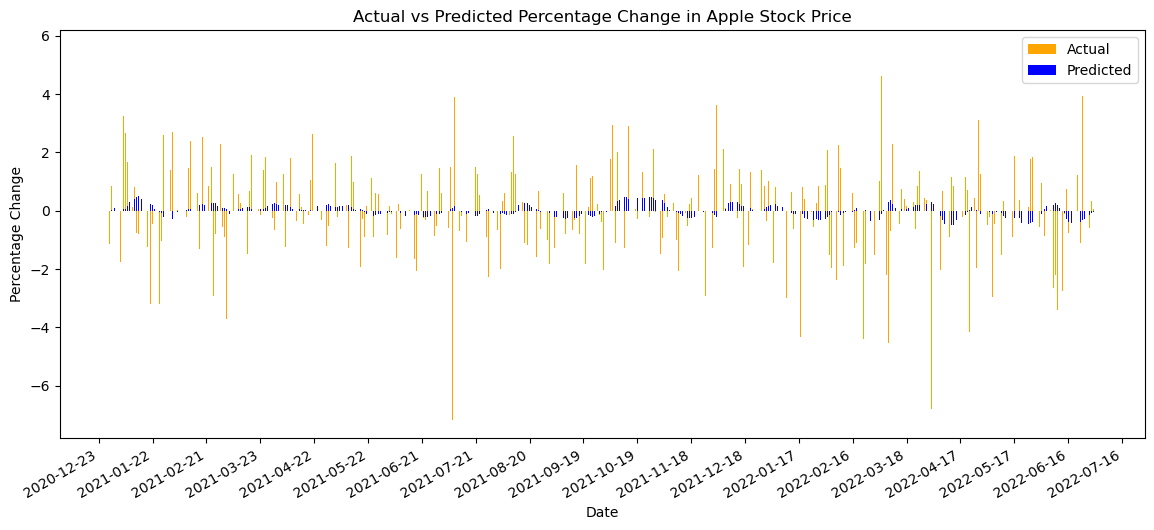

In [241]:
import matplotlib.dates as mdates
import numpy as np

# Assuming 'dates' is a list of dates corresponding to your predictions
dates = apple['Date'][training+1:]  # Adjust as necessary

# Convert dates to numpy array for calculations
dates_np = np.array(dates)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Width of a bar 
width = 0.4

# Creating actual bars
ax.bar(dates_np, real_values_percentage_change.flatten(), width, color='orange', label='Actual')

# Creating predicted bars
# Add one day (in numpy datetime64 format) for the predicted bars
ax.bar(dates_np + np.timedelta64(1, 'D'), predictions_percentage_change.flatten(), width, color='blue', label='Predicted')

# Formatting the dates on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust interval for date ticks
fig.autofmt_xdate()  # Rotation of date labels

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Actual vs Predicted Percentage Change in Apple Stock Price')
plt.legend()

# Displaying the plot
plt.show()

In [242]:
# Calculate the sign of the actual and predicted percentage changes
actual_sign = np.sign(real_values_percentage_change)
predicted_sign = np.sign(predictions_percentage_change)

# Calculate the number of correct and incorrect predictions
correct_predictions = np.sum(actual_sign == predicted_sign)
incorrect_predictions = np.sum(actual_sign != predicted_sign)

print("Number of correct predictions: ", correct_predictions)
print("Number of incorrect predictions: ", incorrect_predictions)

# Calculate the average error (not absolute value)
average_error = np.mean(real_values_percentage_change - predictions_percentage_change)

print("Average error: ", average_error*100, "%")

Number of correct predictions:  196
Number of incorrect predictions:  183
Average error:  0.515102643988804 %


In [243]:
# Initialize cash and stock variables
cash = 50.0
stock = 50.0

# Iterate through each day
for i in range(len(predictions_percentage_change)):
    # If the model predicts a positive % increase for the next day, buy $1 of stock
    if predictions_percentage_change[i] > 0 and cash >= 1:
        cash -= 1
        stock += 1 / (1 + real_values_percentage_change[i] / 100)
    # If the model predicts a negative % increase for the next day, sell $1 of stock
    elif predictions_percentage_change[i] < 0 and stock >= 1:
        cash += 1
        stock -= 1 / (1 - real_values_percentage_change[i] / 100)

    # Update the value of the stock based on the actual % change
    stock *= (1 + real_values_percentage_change[i] / 100)

# Calculate the final balance of cash + stock
final_balance = cash + stock

if isinstance(final_balance, np.ndarray) and final_balance.size == 1:
    final_balance = final_balance.item()

print("Initial balance: $100")
print("Final balance: $", round(final_balance, 2))

Initial balance: $100
Final balance: $ 96.78


In [244]:
# Calculate the percent change from initial to final balance
percent_change = (final_balance - 100) / 100 * 100

# Calculate the number of days
num_days = len(predictions_percentage_change)

# Calculate the annualized percent change
annualized_percent_change = ((final_balance / 100) ** (365 / num_days) - 1) * 100

print("Percent change from initial to final balance: ", round(percent_change, 2), "%")
print("Annualized percent change: ", round(annualized_percent_change, 2), "%")

Percent change from initial to final balance:  -3.22 %
Annualized percent change:  -3.1 %


In [245]:
# Initialize cash and stock variables
cash = 50.0
stock = 50.0

# Calculate the maximum predicted % change
max_predicted_change = np.max(np.abs(predictions_percentage_change))

# Iterate through each day
for i in range(len(predictions_percentage_change)):
    # Calculate the size of the purchase or sale, proportional to the predicted % change
    transaction_size = np.abs(predictions_percentage_change[i]) / max_predicted_change * 5

    # If the model predicts a positive % increase for the next day, buy stock
    if predictions_percentage_change[i] > 0 and cash >= transaction_size:
        cash -= transaction_size
        stock += transaction_size / (1 + real_values_percentage_change[i] / 100)
    # If the model predicts a negative % increase for the next day, sell stock
    elif predictions_percentage_change[i] < 0 and stock * (1 + real_values_percentage_change[i] / 100) >= transaction_size:
        cash += transaction_size
        stock -= transaction_size / (1 - real_values_percentage_change[i] / 100)

    # Update the value of the stock based on the actual % change
    stock *= (1 + real_values_percentage_change[i] / 100)

# Calculate the final balance of cash + stock
final_balance = cash + stock

if isinstance(final_balance, np.ndarray) and final_balance.size == 1:
    final_balance = final_balance.item()

print("Initial balance: $100")
print("Final balance: $", round(final_balance, 2))

Initial balance: $100
Final balance: $ 93.47


In [246]:
# Calculate the percent change from initial to final balance
percent_change = (final_balance - 100) / 100 * 100

# Calculate the number of days
num_days = len(predictions_percentage_change)

# Calculate the annualized percent change
annualized_percent_change = ((final_balance / 100) ** (365 / num_days) - 1) * 100

print("Percent change from initial to final balance: ", round(percent_change, 2), "%")
print("Annualized percent change: ", round(annualized_percent_change, 2), "%")

Percent change from initial to final balance:  -6.53 %
Annualized percent change:  -6.29 %
